In [1]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt

In [2]:
# 载入数据
digits = load_digits()
print(digits.images.shape)

(1797, 8, 8)


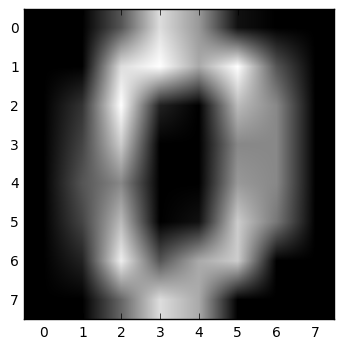

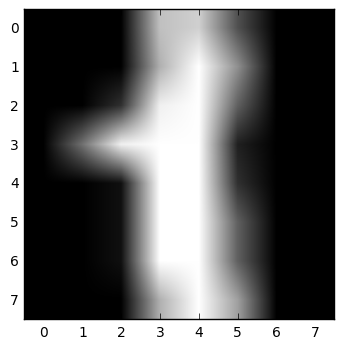

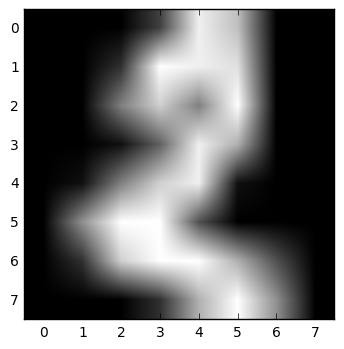

In [3]:
# 显示图片
plt.imshow(digits.images[0],cmap='gray')
plt.show()
plt.imshow(digits.images[1],cmap='gray')
plt.show()
plt.imshow(digits.images[2],cmap='gray')
plt.show()

In [4]:
# 数据
X = digits.data
# 标签
y = digits.target
print(X.shape)
print(y.shape)
print(X[:3])
print(y[:3])

(1797, 64)
(1797,)
[[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.
    5.   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.
    0.   8.   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.
   11.   0.   1.  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.
    0.   0.   6.  13.  10.   0.   0.   0.]
 [  0.   0.   0.  12.  13.   5.   0.   0.   0.   0.   0.  11.  16.   9.
    0.   0.   0.   0.   3.  15.  16.   6.   0.   0.   0.   7.  15.  16.
   16.   2.   0.   0.   0.   0.   1.  16.  16.   3.   0.   0.   0.   0.
    1.  16.  16.   6.   0.   0.   0.   0.   1.  16.  16.   6.   0.   0.
    0.   0.   0.  11.  16.  10.   0.   0.]
 [  0.   0.   0.   4.  15.  12.   0.   0.   0.   0.   3.  16.  15.  14.
    0.   0.   0.   0.   8.  13.   8.  16.   0.   0.   0.   0.   1.   6.
   15.  11.   0.   0.   0.   1.   8.  13.  15.   1.   0.   0.   0.   9.
   16.  16.   5.   0.   0.   0.   0.   3.  13.  16.  16.  11.   5.   0.
    0.   0.   0.   3.  11.  16.

In [5]:
# 定义一个神经网络，结构：64-100-10
# 定义输入层到隐藏层之间的权值矩阵
V = np.random.random((64,100))*2-1
# 定义隐藏层到输出层之间的权值矩阵
W = np.random.random((100,10))*2-1

# 数据切分
# 1/4为测试集，3/4为训练集
X_train,X_test,y_train,y_test = train_test_split(X,y)

# 标签二值化 
# 0->1000000000
# 3->0001000000
# 9->0000000001
labels_train = LabelBinarizer().fit_transform(y_train)
print(y_train[:5])
print(labels_train[:5])

[7 6 9 2 5]
[[0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]]


In [6]:
# 激活函数
def sigmoid(x):
    return 1/(1+np.exp(-x))

# 激活函数的导数
def dsigmoid(x):
    return x*(1-x)

# 训练模型
def train(X,y,steps=10000,lr=0.11):
    global V,W
    for n in range(steps+1):
        # 随机选取一个数据
        i = np.random.randint(X.shape[0])
        # 获取一个数据
        x = X[i]
        x = np.atleast_2d(x)
        # BP算法公式
        # 计算隐藏层的输出
        L1 = sigmoid(np.dot(x,V))
        # 计算输出的输出
        L2 = sigmoid(np.dot(L1,W))
        # 计算L2_delta，L1_delta
        L2_delta = (y[i]-L2)*dsigmoid(L2)
        L1_delta = L2_delta.dot(W.T)*dsigmoid(L1)
        # 更新权值
        W += lr*L1.T.dot(L2_delta)
        V += lr*x.T.dot(L1_delta)
        
        # 每训练1000次预测一次准确率
        if n%1000==0:
            output = predict(X_test)
            predictions = np.argmax(output,axis=1)
            acc = np.mean(np.equal(predictions,y_test))
            print('steps:',n,'accuracy:',acc)

def predict(x):
    # 计算隐藏层的输出
    L1 = sigmoid(np.dot(x,V))
    # 计算输出的输出
    L2 = sigmoid(np.dot(L1,W))
    return L2

In [32]:
train(X_train,labels_train,30000)

steps: 0 accuracy: 0.08444444444444445
steps: 1000 accuracy: 0.52
steps: 2000 accuracy: 0.64
steps: 3000 accuracy: 0.7222222222222222
steps: 4000 accuracy: 0.7955555555555556
steps: 5000 accuracy: 0.8266666666666667
steps: 6000 accuracy: 0.84
steps: 7000 accuracy: 0.8444444444444444
steps: 8000 accuracy: 0.8555555555555555
steps: 9000 accuracy: 0.8577777777777778
steps: 10000 accuracy: 0.9488888888888889
steps: 11000 accuracy: 0.94
steps: 12000 accuracy: 0.9444444444444444
steps: 13000 accuracy: 0.9622222222222222
steps: 14000 accuracy: 0.9755555555555555
steps: 15000 accuracy: 0.9511111111111111
steps: 16000 accuracy: 0.9688888888888889
steps: 17000 accuracy: 0.9711111111111111
steps: 18000 accuracy: 0.9688888888888889
steps: 19000 accuracy: 0.9755555555555555
steps: 20000 accuracy: 0.9688888888888889
steps: 21000 accuracy: 0.9622222222222222
steps: 22000 accuracy: 0.9666666666666667
steps: 23000 accuracy: 0.9688888888888889
steps: 24000 accuracy: 0.9755555555555555
steps: 25000 accur

In [34]:
output = predict(X_test)
predictions = np.argmax(output,axis=1)
print(classification_report(predictions,y_test))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        43
          1       1.00      0.94      0.97        48
          2       1.00      0.98      0.99        54
          3       0.95      0.98      0.97        43
          4       0.96      1.00      0.98        43
          5       1.00      0.98      0.99        48
          6       1.00      0.98      0.99        41
          7       1.00      0.98      0.99        53
          8       0.89      0.98      0.93        43
          9       1.00      1.00      1.00        34

avg / total       0.98      0.98      0.98       450



In [35]:
print(confusion_matrix(predictions,y_test))

[[43  0  0  0  0  0  0  0  0  0]
 [ 0 45  0  0  1  0  0  0  2  0]
 [ 0  0 53  0  0  0  0  0  1  0]
 [ 0  0  0 42  0  0  0  0  1  0]
 [ 0  0  0  0 43  0  0  0  0  0]
 [ 0  0  0  1  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 40  0  1  0]
 [ 0  0  0  1  0  0  0 52  0  0]
 [ 0  0  0  0  1  0  0  0 42  0]
 [ 0  0  0  0  0  0  0  0  0 34]]
